## Imports

In [3]:
import time
from timeit import default_timer as timer
import numpy as np
from functools import wraps
import cProfile
import subprocess
NAME = "Phoebe"

# getAcc Profiling Comparisons

In [ ]:
# getAcc() 
! python -m memory_profiler sph.py

# getPressure Profiling Comparisons

In [ ]:
# get pressure
! python -m memory_profiler sph.py

# getDensity Profiling Comparisons

In [ ]:
# get density
! python -m memory_profiler sph.py

# pairwise Profiling Comparisons

In [ ]:
# pairwise 
! python -m memory_profiler sph.py

# gradW Profiling Comparisons

In [9]:
# gradW Original
! python -m memory_profiler sph.py

Filename: sph.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    28  119.438 MiB -2070.977 MiB         301   @profile	
    29                                         def gradW( x, y, z, h ):
    30                                         	"""
    31                                         	Gradient of the Gausssian Smoothing kernel (3D)
    32                                         	x     is a vector/matrix of x positions
    33                                         	y     is a vector/matrix of y positions
    34                                         	z     is a vector/matrix of z positions
    35                                         	h     is the smoothing length
    36                                         	wx, wy, wz     is the evaluated gradient
    37                                         	"""
    38                                         	
    39  123.105 MiB  747.633 MiB         301   	r = np.sqrt(x**2 + y**2 + z**2)
    40                        

In [13]:
# gradW Optimized
! python -m memory_profiler opt_sph.py

Filename: opt_sph.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    28  119.555 MiB -1988.168 MiB         301   @profile	
    29                                         def gradW( x, y, z, h ):
    30                                         	"""
    31                                         	Gradient of the Gausssian Smoothing kernel (3D)
    32                                         	x     is a vector/matrix of x positions
    33                                         	y     is a vector/matrix of y positions
    34                                         	z     is a vector/matrix of z positions
    35                                         	h     is the smoothing length
    36                                         	wx, wy, wz     is the evaluated gradient
    37                                         	"""
    38                                         	# initalize the arrays
    39  119.555 MiB -273.734 MiB         301   	r = np.empty(x.shape, dtype=x.dtype)

## gradW Optimization Results


Version  |Initial (MiB)|Max (MiB)|Final (MiB)   
---------|-------------|---------|----------
Original |   119.438   | 870.738 | 125.551 
Optimized|   119.555   | 216.289 | 125.668

By optimizing the gradW function with np.empty to initailze arrays and using in-place operations we were able to significantly reduce the maximum memory usage during this function which increases the more efficient use of memory allocation. 

# W Profiling Comparisons

In [ ]:
# W
! python -m memory_profiler sph.py

# main Profiling Comparisons

In [ ]:
# main
! python -m memory_profiler sph.py

# Mprof 

In [ ]:
! python -m mprof run sph.py

In [ ]:
! python -m mprof plot mprofile_20250204143302.dat

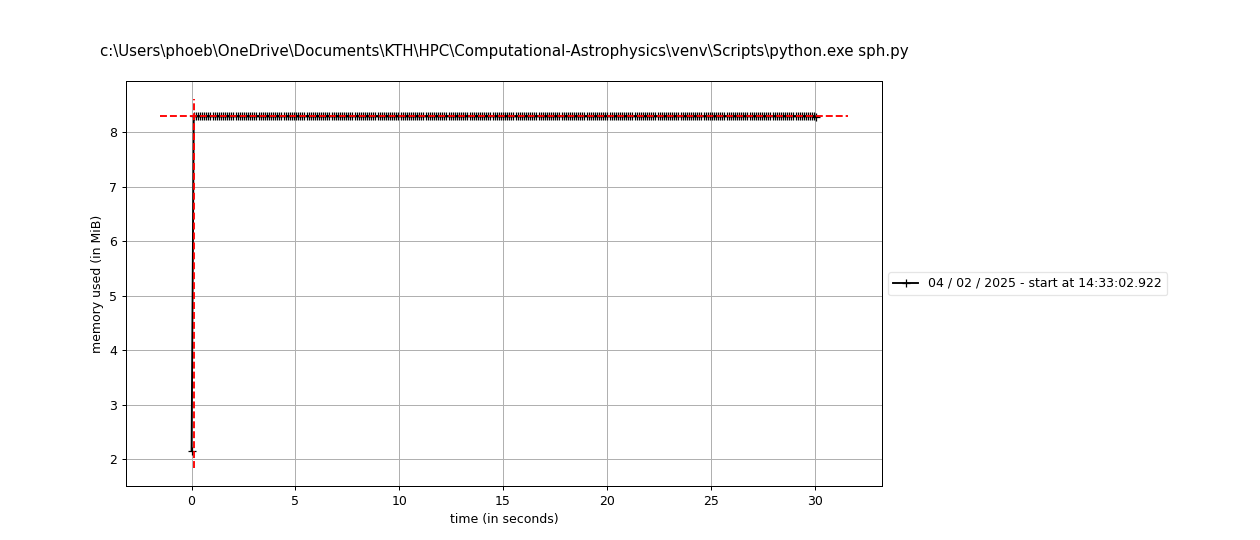

# mprof notes
Not really sure how well this represents the memory usage... but it creates a lot right at the beginning. 